# Description du probleme

Modélisation du coût moyen des sinistres en assurance RC automobile : Ce projet porte sur la modélisation des coût moyen des sinistres en fonction de la puissance fiscale, l’âge du véhicule, l’âge du conducteur, la marque et le carburant… Le modèle glm et les méthodes de machine Learning seront utilisés pour modéliser le coût moyen des sinistres

**Importing packages**

In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


reading data

In [116]:
production= pd.read_csv(r'C:\Users\hamza.addi\Downloads\Untitled_Message\production.csv' , encoding='latin-1', sep=";")
sinistre= pd.read_csv(r'C:\Users\hamza.addi\Downloads\Untitled_Message\sinistre.csv', encoding='latin-1', sep=";")

In [117]:
sinistre.rename(columns={"annee_reference":"exercice"}, inplace=True)
production.rename(columns={"Comubsution":"combustion"}, inplace=True)

# Data preprocessing 

## Data cleaning

In [118]:
production.head()

,numepolice,exercice,DMC,DOB,Sexe,Zone,combustion,PF,exposition,Unnamed: 9
0,81901.0,2014,13/10/1981,10/05/1983,M,Tanger-Tétouan-Hoceïma,Essence,<8,0.783100,NaN
1,32189.0,2009,06/06/1974,29/10/1990,M,Tanger-Tétouan-Hoceïma,Essence,<8,0.869327,NaN
2,19126.0,2012,23/01/1997,13/02/1955,M,Tanger-Tétouan-Hoceïma,Essence,<8,0.167662,NaN
3,29515.0,2017,08/04/1997,10/03/1967,M,Tanger-Tétouan-Hoceïma,Essence,<8,0.864763,NaN
4,72077.0,2016,09/12/1994,01/07/1983,M,Tanger-Tétouan-Hoceïma,Essence,<8,0.369087,NaN


In [119]:
sinistre.head()

,numepolice,exercice,n_sinistre,montantsinistre
0,81901,2014,20122123,74562.071796
1,32189,2009,20122124,15406.714135
2,19126,2012,20122125,1414.462804
3,29557,2009,20122126,829.018140
4,32576,2011,20122127,32718.336369


In [120]:
production.shape

(10009, 10)

In [121]:
production.duplicated()

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
9979     False
9980     False
9981     False
9982     False
9983     False
9984     False
9985     False
9986     False
9987     False
9988     False
9989     False
9990     False
9991     False
9992     False
9993     False
9994     False
9995     False
9996     False
9997     False
9998     False
9999     False
10000     True
10001     True
10002     True
10003     True
10004     True
10005     True
10006     True
10007     True
10008     True
Length: 10009, dtype: bool

In [122]:
#on enleve les lignes dupliquees dans notre dataset  
production = production.drop_duplicates()

In [123]:
production.shape

(10000, 10)

In [124]:
#suppression des colonnes non utiles 
production.drop('Unnamed: 9', axis=1, inplace = True)

In [125]:
sinistre.sample(5)

,numepolice,exercice,n_sinistre,montantsinistre
175,98755,2017,20122298,1549.414209
5149,87124,2017,20127272,16069.782197
1574,32906,2009,20123697,982.827070
4808,52839,2011,20126931,8599.233065
3812,58672,2009,20125935,845.614241


dealing with nan values 

In [126]:
print(production.isnull().sum())
print('-----------------')
print(sinistre.isnull().sum())

numepolice    1
exercice      0
DMC           1
DOB           1
Sexe          1
Zone          5
combustion    1
PF            4
exposition    0
dtype: int64
-----------------
numepolice         0
exercice           0
n_sinistre         0
montantsinistre    0
dtype: int64


In [127]:
production.dropna(inplace=True)
sinistre.dropna(inplace=True)

In [128]:
production.shape

(9988, 9)

In [129]:
production.dtypes

numepolice    float64
exercice        int64
DMC            object
DOB            object
Sexe           object
Zone           object
combustion     object
PF             object
exposition    float64
dtype: object

In [130]:
sinistre.dtypes

numepolice           int64
exercice             int64
n_sinistre           int64
montantsinistre    float64
dtype: object

**correct the type of features**

In [131]:
production["numepolice"]= production["numepolice"].astype(int)
sinistre["numepolice"]= sinistre["numepolice"].astype(int)
production["exercice"]= production["exercice"].astype(int)
sinistre["exercice"]= sinistre["exercice"].astype(int)

In [132]:
pd.Timestamp.min

Timestamp('1677-09-21 00:12:43.145225')

In [133]:
pd.Timestamp.max

Timestamp('2262-04-11 23:47:16.854775807')

In [134]:
production['date2'] = pd.to_datetime(production['DOB'], errors = 'coerce')

In [136]:
production[production['date2'].isna()]

AttributeError: 'Series' object has no attribute 'isna'

In [137]:
for date in ["DMC","DOB"]:
    production[date] = pd.to_datetime(production[date], errors = 'coerce')
    production[date]=production[date].dt.year

In [138]:
production.dropna(axis=0,inplace=True)
production.drop('date2',axis=1, inplace=True)

In [139]:
plt.boxplot(production['DOB'])

{'boxes': [<matplotlib.lines.Line2D at 0x1c5ebcaaef0>],
 'caps': [<matplotlib.lines.Line2D at 0x1c5ebdcacf8>,
 'fliers': [<matplotlib.lines.Line2D at 0x1c5ebd13c50>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1c5eba2a940>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1c5ebdca630>,
  <matplotlib.lines.Line2D at 0x1c5ebdcaf60>]}

In [140]:
production.shape

(9987, 9)

In [141]:
production['DOB'] = production['DOB'].astype(int)

# Create new columns

In [142]:
production["age permis"]=production["exercice"]-production["DOB"]
production["ancieneté de véhicule"]=production["exercice"]-production["DMC"]

In [198]:
production.drop(["DMC","DOB"],axis=1, inplace=True)

In [199]:
production.shape

(9685, 9)

Deleting negative values

In [200]:
production.min()

numepolice                                     10
exercice                                     2009
Sexe                                            F
Zone                      Laâyoune-Sakia El Hamra
combustion                                 Diesel
PF                                          10-14
exposition                            4.87873e-05
age permis                                     15
ancieneté de véhicule                           0
dtype: object

In [201]:
production.describe()

,numepolice,exercice,exposition,age permis,ancieneté de véhicule
count,9685.000000,9685.000000,9685.000000,9685.000000,9685.000000
mean,50243.163862,2013.415901,0.497137,49.289830,20.239855
std,28859.092161,2.872852,0.288628,17.605642,11.396336
min,10.000000,2009.000000,0.000049,15.000000,0.000000
25%,25044.000000,2011.000000,0.247441,34.000000,11.000000
50%,50364.000000,2014.000000,0.494651,49.000000,20.000000
75%,75573.000000,2016.000000,0.744306,64.000000,30.000000
max,99987.000000,2017.000000,0.999999,83.000000,43.000000


In [202]:
sinistre = sinistre[(sinistre[sinistre.columns] >= 0).all(axis=1)]

In [203]:
production = production[(production[list(('ancieneté de véhicule','exposition'))] >= 0).all(axis=1)]

In [204]:
l= []
for i in list(sinistre['numepolice']):
    if i not in list(production['numepolice']):
         l.append(i)
len(l)

0

In [205]:
sinistre

,numepolice,exercice,n_sinistre,montantsinistre
0,81901,2014,20122123,74562.071796
1,32189,2009,20122124,15406.714135
2,19126,2012,20122125,1414.462804
3,29557,2009,20122126,829.018140
4,32576,2011,20122127,32718.336369
5,67716,2011,20122128,1279.714272
6,67716,2011,20122129,785.947622
7,67716,2011,20122130,1447.896019
8,44974,2014,20122131,506.098427
9,63741,2011,20122132,2110.427469


In [206]:
m= []
for i in list(sinistre['exercice']):
    if i not in list(production['exercice']):
         m.append(i)
len(m)

0

In [207]:
for i in l:
    sinistre.drop(sinistre.loc[sinistre['numepolice']==i].index, inplace=True)

In [208]:
sinistre.shape

(6895, 4)

In [209]:
sinistre.shape

(6895, 4)

# Analyse descriptive

In [210]:
production.isnull().sum()

numepolice               0
exercice                 0
Sexe                     0
Zone                     0
combustion               0
PF                       0
exposition               0
age permis               0
ancieneté de véhicule    0
dtype: int64

In [211]:
sinistre.isnull().sum()

numepolice         0
exercice           0
n_sinistre         0
montantsinistre    0
dtype: int64

**combustion**

In [212]:
production['combustion'].unique()

array(['Essence', 'Diesel'], dtype=object)

In [213]:
combustion=production.groupby(by="combustion").size()
combustion

combustion
Diesel     6292
Essence    3393
dtype: int64

In [214]:
combustion.plot.bar()

**puissance_fiscale**

In [215]:
production['PF'].unique()

array(['<8', '8-10', '10-14', '>=14'], dtype=object)

In [216]:
puissance_fiscale=production.groupby(by="PF").size()
puissance_fiscale

PF
10-14    1931
8-10     2913
<8       3393
>=14     1448
dtype: int64

In [217]:
puissance_fiscale.plot.bar()

**SEXE**

In [218]:
production['Sexe'].unique()

array(['M', 'F'], dtype=object)

In [219]:
SEXE=production.groupby(by="Sexe").size()
SEXE

Sexe
F    3867
M    5818
dtype: int64

In [220]:
SEXE.plot.bar()

**Exercice**

In [221]:
production['exercice'].unique()

array([2014, 2009, 2012, 2017, 2016, 2011, 2015], dtype=int64)

In [222]:
Exercice=production.groupby(by="exercice").size()
Exercice

exercice
2009    1967
2011     955
2012     972
2014    1497
2015    1200
2016    1495
2017    1599
dtype: int64

In [223]:
Exercice.plot.bar()

Date obtention du permis.

**Age**

In [224]:
production['age permis'].unique()

array([31, 19, 57, 50, 33, 69, 48, 63, 54, 28, 53, 36, 52, 30, 68, 81, 23,
       41, 64, 71, 70, 78, 45, 73, 55, 43, 74, 58, 26, 32, 46, 49, 77, 82,
       20, 56, 35, 25, 67, 44, 59, 65, 42, 75, 27, 29, 34, 62, 24, 22, 21,
       39, 18, 51, 40, 60, 72, 79, 47, 80, 38, 37, 17, 66, 61, 83, 76, 16,
       15], dtype=int64)

In [225]:
age=production.groupby(by="age permis").size()
age

age permis
15      7
16     44
17     26
18     62
19     75
20     64
21     79
22    130
23    161
24    166
25    174
26    164
27    151
28    157
29    184
30    173
31    170
32    163
33    168
34    147
35    160
36    175
37    166
38    164
39    173
40    150
41    204
42    124
43    162
44    137
     ... 
54    172
55    167
56    173
57    158
58    158
59    167
60    160
61    149
62    140
63    163
64    132
65    166
66    148
67    146
68    157
69    164
70    157
71    177
72    176
73    158
74    153
75    151
76    126
77    129
78    102
79     78
80    100
81     53
82     45
83     25
Length: 69, dtype: int64

In [226]:
age.plot.bar()

**ancieneté de véhicule**

In [227]:
production['ancieneté de véhicule'].unique()

array([33, 35, 15, 20, 22, 12, 23, 25, 16, 30, 34, 13, 26, 32, 19, 14,  1,
       10, 17, 37,  4,  8, 11, 24, 21, 39,  0, 18,  3, 27,  5,  6, 42,  2,
        7, 43, 28, 40, 41, 36,  9, 31, 29, 38], dtype=int64)

In [228]:
véhicule=production.groupby(by="ancieneté de véhicule").size()
véhicule

ancieneté de véhicule
0     126
1     154
2     178
3     215
4     217
5     250
6     285
7     238
8     248
9     257
10    253
11    259
12    250
13    249
14    232
15    262
16    240
17    249
18    285
19    248
20    222
21    260
22    285
23    261
24    249
25    236
26    240
27    239
28    250
29    248
30    218
31    253
32    273
33    252
34    258
35    241
36    187
37    186
38    141
39    150
40    156
41     79
42     67
43     39
dtype: int64

In [229]:
véhicule.plot.bar()

# Pour les sinistres

**exercice**

In [230]:
sinistre['exercice'].unique()

array([2014, 2009, 2012, 2011, 2016, 2017, 2015], dtype=int64)

In [231]:
exercicesinistre=sinistre.groupby(by="exercice").size()
exercicesinistre

exercice
2009    1384
2011     707
2012     736
2014    1037
2015     839
2016    1010
2017    1182
dtype: int64

In [232]:
exercicesinistre.plot.bar()

**Charge**

In [233]:
sinistre.head()

,numepolice,exercice,n_sinistre,montantsinistre
0,81901,2014,20122123,74562.071796
1,32189,2009,20122124,15406.714135
2,19126,2012,20122125,1414.462804
3,29557,2009,20122126,829.018140
4,32576,2011,20122127,32718.336369


In [234]:
Charge=sinistre.groupby(by="montantsinistre").size()
Charge

montantsinistre
80.316882        1
167.669710       1
188.960066       1
196.205624       1
202.178193       1
203.505769       1
205.500743       1
206.552074       1
214.824447       1
227.723377       1
230.638165       1
232.336298       1
233.683289       1
234.504596       1
236.052345       1
239.800429       1
242.767462       1
249.509464       1
252.900201       1
252.915011       1
254.403304       1
256.113251       1
256.970588       1
265.416279       1
266.437159       1
269.259612       1
269.683165       1
274.428902       1
276.144183       1
277.931794       1
                ..
75727.786165     1
76142.393409     1
76494.066076     1
76653.051922     1
77202.809026     1
77397.852106     1
77757.587704     1
78210.816127     1
78259.619486     1
78414.805721     1
79212.837192     1
79234.305685     1
80741.581410     1
80936.176487     1
81535.578080     1
82687.849820     1
83381.736845     1
83876.205272     1
84091.747790     1
84155.314626     1
84898.415576   

In [235]:
fig = plt.figure(1, figsize=(15, 10))

plt.plot(Charge)


# Join the two dataframes

**drop non useful columns**

In [236]:
Sinistre = sinistre.drop('n_sinistre', axis=1)

In [237]:
Sinistre

,numepolice,exercice,montantsinistre
0,81901,2014,74562.071796
1,32189,2009,15406.714135
2,19126,2012,1414.462804
3,29557,2009,829.018140
4,32576,2011,32718.336369
5,67716,2011,1279.714272
6,67716,2011,785.947622
7,67716,2011,1447.896019
8,44974,2014,506.098427
9,63741,2011,2110.427469


In [238]:
charge_totale=sinistre.groupby(["numepolice","exercice"])["montantsinistre"].sum()
nb_accidents=sinistre.groupby(["numepolice","exercice"])["montantsinistre"].count()

sinistre_new=pd.DataFrame(charge_totale/nb_accidents)
sinistre_new["cout moyen"]=sinistre_new["montantsinistre"]

sinistre_new.drop("montantsinistre",axis=1,inplace=True)
sinistre_new.reset_index(inplace=True)

In [239]:
#Pour la base des données production les indices sont les memes 

production.groupby(["numepolice",	"exercice"])["Sexe"].count().sum()/production.shape[0]

1.0

In [240]:
result = pd.merge(production, sinistre_new, how='outer', on=['numepolice', 'exercice'])

In [241]:
result.shape

(9685, 10)

In [242]:
result.isnull().sum()

numepolice                  0
exercice                    0
Sexe                        0
Zone                        0
combustion                  0
PF                          0
exposition                  0
age permis                  0
ancieneté de véhicule       0
cout moyen               5160
dtype: int64

In [243]:
result.tail()

,numepolice,exercice,Sexe,Zone,combustion,PF,exposition,age permis,ancieneté de véhicule,cout moyen
9680,92887,2009,F,Dakhla-Oued Ed Dahab,Diesel,>=14,0.971814,18,10,27623.865711
9681,40374,2014,F,Dakhla-Oued Ed Dahab,Diesel,>=14,0.398156,64,22,NaN
9682,8750,2014,F,Dakhla-Oued Ed Dahab,Diesel,>=14,0.707098,78,2,19577.193889
9683,63415,2012,F,Dakhla-Oued Ed Dahab,Diesel,>=14,0.583604,19,6,NaN
9684,92945,2016,F,Dakhla-Oued Ed Dahab,Diesel,>=14,0.817461,72,31,1256.959850


In [244]:
import numpy as np
result.replace(np.nan, 0, inplace=True)

In [245]:
result.tail()

,numepolice,exercice,Sexe,Zone,combustion,PF,exposition,age permis,ancieneté de véhicule,cout moyen
9680,92887,2009,F,Dakhla-Oued Ed Dahab,Diesel,>=14,0.971814,18,10,27623.865711
9681,40374,2014,F,Dakhla-Oued Ed Dahab,Diesel,>=14,0.398156,64,22,0.000000
9682,8750,2014,F,Dakhla-Oued Ed Dahab,Diesel,>=14,0.707098,78,2,19577.193889
9683,63415,2012,F,Dakhla-Oued Ed Dahab,Diesel,>=14,0.583604,19,6,0.000000
9684,92945,2016,F,Dakhla-Oued Ed Dahab,Diesel,>=14,0.817461,72,31,1256.959850


In [246]:
result.drop(['numepolice','exercice'], inplace= True,axis=1)

In [247]:
result.head()

,Sexe,Zone,combustion,PF,exposition,age permis,ancieneté de véhicule,cout moyen
0,M,Tanger-Tétouan-Hoceïma,Essence,<8,0.783100,31,33,74562.071796
1,M,Tanger-Tétouan-Hoceïma,Essence,<8,0.869327,19,35,15406.714135
2,M,Tanger-Tétouan-Hoceïma,Essence,<8,0.167662,57,15,1414.462804
3,M,Tanger-Tétouan-Hoceïma,Essence,<8,0.864763,50,20,0.000000
4,M,Tanger-Tétouan-Hoceïma,Essence,<8,0.369087,33,22,0.000000


In [248]:
result_avant=result

In [249]:
result.describe()

,exposition,age permis,ancieneté de véhicule,cout moyen
count,9685.000000,9685.000000,9685.000000,9685.000000
mean,0.497137,49.289830,20.239855,5353.617803
std,0.288628,17.605642,11.396336,11340.394683
min,0.000049,15.000000,0.000000,0.000000
25%,0.247441,34.000000,11.000000,0.000000
50%,0.494651,49.000000,20.000000,0.000000
75%,0.744306,64.000000,30.000000,3414.974970
max,0.999999,83.000000,43.000000,107800.308903


In [250]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for i in ['Sexe',	'Zone',	'combustion',	'PF'] :
    result[i]=le.fit_transform(result[i])

In [251]:
import seaborn as sns
sns.set(rc={'figure.figsize':(14.7,10.27)})

In [252]:
result.to_csv("result.csv")

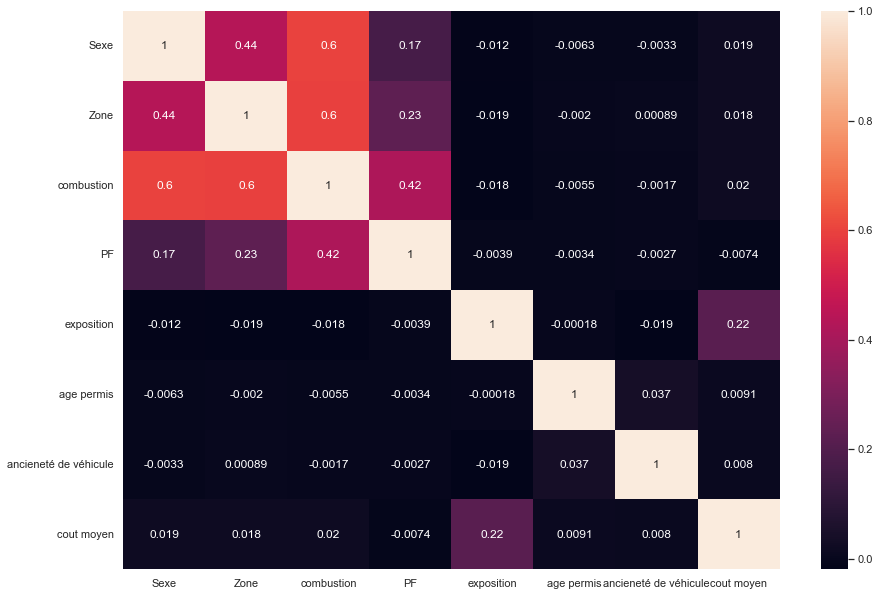

In [257]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

corrMatrix = result.corr()
sns.heatmap(corrMatrix, annot=True)
plt.savefig('plot.png', dpi=300)

<AxesSubplot:xlabel='PF', ylabel='Count'>

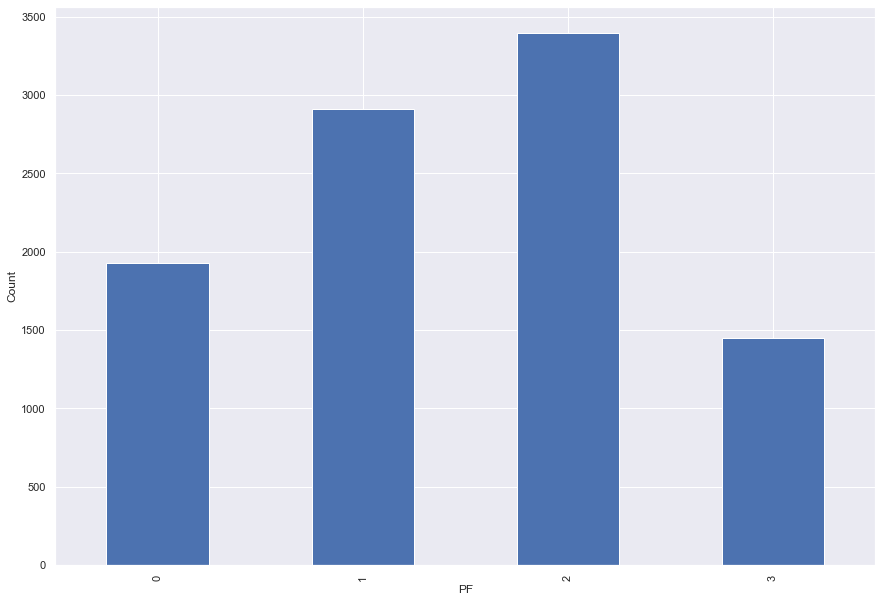

In [258]:

ss=result.groupby(by="PF").size()
plt.ylabel('Count')
ss.plot.bar()

Statistique descriptive des variables

**Sexe**

In [259]:
print("Le nombre des femmes : {} \nLe nombre des hommes : {}".format(sum(result["Sexe"]),result["Sexe"].shape[0]-sum(result["Sexe"])))


Le nombre des femmes : 5818 
Le nombre des hommes : 3867


In [260]:

print("Le pourcentage des femme est de {} \nLe pourcentage des hommes est de {}".format(sum(result["Sexe"])/result["Sexe"].shape[0],1- sum(result["Sexe"])/result["Sexe"].shape[0]))

Le pourcentage des femme est de 0.6007227671657202 
Le pourcentage des hommes est de 0.39927723283427985


**Combustion**

In [261]:
result_avant

,Sexe,Zone,combustion,PF,exposition,age permis,ancieneté de véhicule,cout moyen
0,1,11,1,2,0.783100,31,33,74562.071796
1,1,11,1,2,0.869327,19,35,15406.714135
2,1,11,1,2,0.167662,57,15,1414.462804
3,1,11,1,2,0.864763,50,20,0.000000
4,1,11,1,2,0.369087,33,22,0.000000
...,...,...,...,...,...,...,...,...
9680,0,4,0,3,0.971814,18,10,27623.865711
9681,0,4,0,3,0.398156,64,22,0.000000
9682,0,4,0,3,0.707098,78,2,19577.193889
9683,0,4,0,3,0.583604,19,6,0.000000


# Plan d'action :
* Modelisation statistique
* Utilisation des modeles ML
* Organiser le Notebook
* Statistique inferentielle  



In [262]:
sinistre_new

,numepolice,exercice,cout moyen
0,10,2017,1408.642852
1,49,2011,15041.920772
2,80,2009,8197.719009
3,89,2009,1216.393382
4,112,2016,1012.267204
...,...,...,...
4520,99889,2012,20840.486632
4521,99893,2012,18700.683832
4522,99975,2017,20689.122540
4523,99979,2015,14702.461540


<AxesSubplot:xlabel='cout moyen', ylabel='Count'>

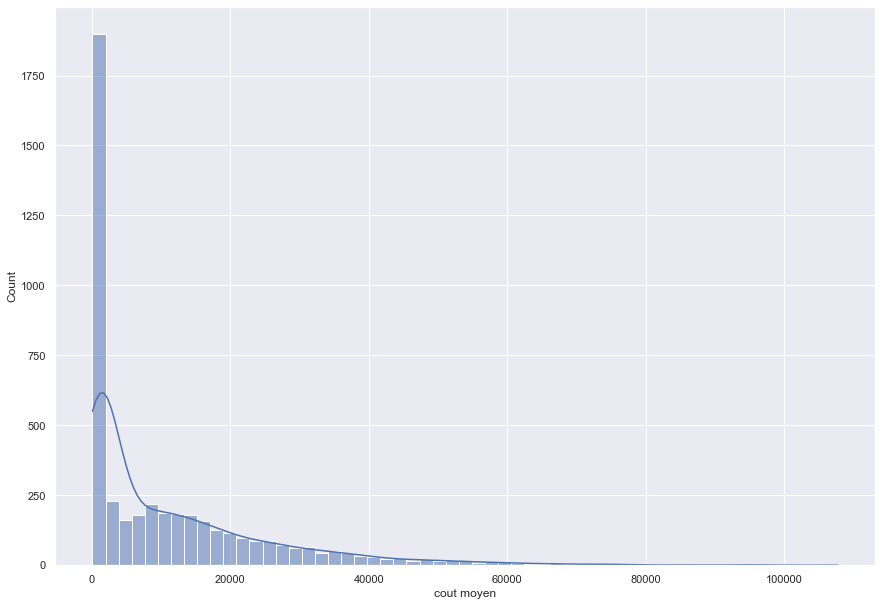

In [263]:
import seaborn as sns

ss=sinistre_new["cout moyen"]
sns.histplot(ss,stat='count',kde='True')
#ss.sparse.density()

<AxesSubplot:xlabel='cout moyen', ylabel='Count'>

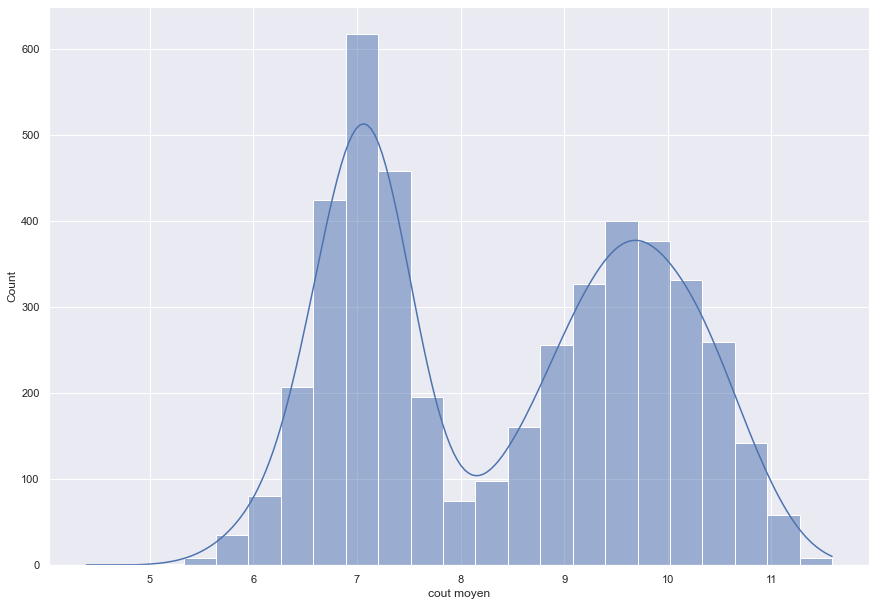

In [267]:
import seaborn as sns

ss=np.log(sinistre_new["cout moyen"])
sns.histplot(ss,kde=True)
#ss.sparse.density()

In [268]:
sinistre_new["cout moyen"].describe()

count      4525.000000
mean      11458.516778
std       14328.999899
min          80.316882
25%        1186.098035
50%        5360.464760
75%       17045.976817
max      107800.308903
Name: cout moyen, dtype: float64

## Test de "Kolmogorov-Smirnov"


### Test pour la loi log-normale

https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/

In [282]:
from scipy.stats import *
from numpy.random import lognormal

count=sinistre_new["cout moyen"].count()
mu, sigma = sinistre_new["cout moyen"].mean(),sinistre_new["cout moyen"].std()
normal_std = np.sqrt(np.log(1 + (sigma/mu)**2))
normal_mean = np.log(mu) - normal_std**2 / 2
log_norm=lognormal(normal_mean,normal_std,count)

In [283]:
normal_mean

8.875747685065404

In [284]:
hs.mean()

11030.020904555804

In [286]:
ks_2samp(sinistre_new["cout moyen"],log_norm )

KstestResult(statistic=0.3292817679558011, pvalue=1.660219134232328e-217)

**p-value < 5%  :**
The test suggests that the lognormal distribution does not fit the data

Loi exponentielle :

In [287]:
from numpy.random.mtrand import exponential
Lamda=1/sigma


In [288]:
expon_law=exponential(lamda,count)

NameError: name 'lamda' is not defined

testing

In [101]:
ks_2samp(sinistre['montantsinistre'],expon_law )

NameError: name 'expon_law' is not defined

La loi Gamma

In [102]:
count=sinistre["montantsinistre"].count()
mu, sigma = sinistre["montantsinistre"].mean(),sinistre["montantsinistre"].std()

lamda=mu/sigma**2
a=(mu/sigma)**2

loi_gamma=np.random.gamma(lamda,a,count)

In [103]:
loi_gamma

array([0., 0., 0., ..., 0., 0., 0.])

In [104]:
#test
ks_2samp(sinistre['montantsinistre'],loi_gamma )

KstestResult(statistic=1.0, pvalue=0.0)

Modélisation de la variable alétoire pour un montant inférieur et supérieur à la moyenne, vu que les deux distributions sont les suivant pour les cas :

**Montant sinistre<moyenne :**

<AxesSubplot:xlabel='montantsinistre', ylabel='Count'>

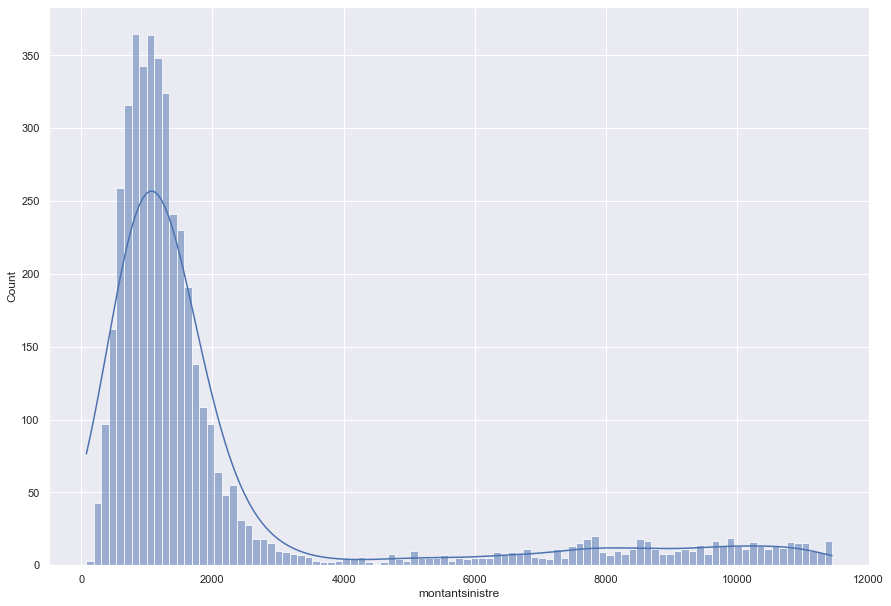

In [105]:
import seaborn as sns

ss=sinistre["montantsinistre"][sinistre["montantsinistre"]<mu]
sns.histplot(ss,stat='count',kde='True')
#ss.sparse.density()

In [106]:
from scipy.stats import *
from numpy.random import *
montant_faible=sinistre["montantsinistre"][1000<sinistre["montantsinistre"]<4000]
countf=montant_faible.count()
muf, sigmaf = montant_faible.mean(),montant_faible.std()
normal_std = np.sqrt(np.log(1 + (sigmaf/muf)**2))
normal_mean = np.log(muf) - normal_std**2 / 2
hs = np.random.lognormal(normal_mean, normal_std, 1000)
log_norm=normal(muf,sigmaf,countf)
expon_lawf=exponential(1/sigmaf,count)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [107]:
ks_2samp(montant_faible,log_norm )

NameError: name 'montant_faible' is not defined

**montant sinistre > moyenne :**

<AxesSubplot:xlabel='montantsinistre', ylabel='Count'>

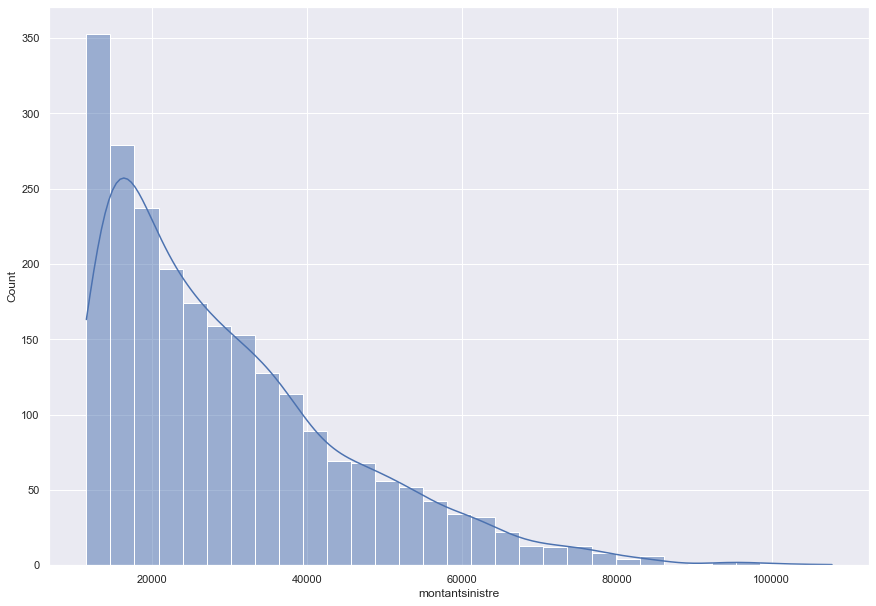

In [108]:
import seaborn as sns

ss=sinistre["montantsinistre"][sinistre["montantsinistre"]>mu]
sns.histplot(ss,stat='count',kde='True')
#ss.sparse.density()

In [109]:
from scipy.stats import *
from numpy.random import lognormal
grand_montant=sinistre["montantsinistre"][sinistre["montantsinistre"]>20000]
count=grand_montant.count()
mu, sigma = grand_montant.mean(),grand_montant.std()
normal_std = np.sqrt(np.log(1 + (sigma/mu)**2))
normal_mean = np.log(mu) - normal_std**2 / 2
hs = np.random.lognormal(normal_mean, normal_std, 1000)
log_norm=lognormal(normal_mean,normal_std,count)

In [110]:
ks_2samp(grand_montant,log_norm )

KstestResult(statistic=0.06901128069011281, pvalue=0.001522582452730701)

Machine Learning Part

In [111]:
result

,Sexe,Zone,combustion,PF,exposition,age permis,ancieneté de véhicule,montantsinistre
0,1,11,1,2,0.783100,31,33,74562.071796
1,1,11,1,2,0.869327,19,35,15406.714135
2,1,11,1,2,0.167662,57,15,1414.462804
3,1,11,1,2,0.864763,50,20,0.000000
4,1,11,1,2,0.369087,33,22,0.000000
...,...,...,...,...,...,...,...,...
12050,0,4,0,3,0.398156,64,22,0.000000
12051,0,4,0,3,0.707098,78,2,19577.193889
12052,0,4,0,3,0.583604,19,6,0.000000
12053,0,4,0,3,0.817461,72,31,1378.129647


In [112]:
import numpy as np

from scipy.stats import uniform, randint
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

import xgboost as xgb

ModuleNotFoundError: No module named 'keras'

In [ ]:
X = result.drop('montantsinistre', axis=1)
y = np.array(result["montantsinistre"])

'''
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
'''
# build the scaler model
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
xgb_model = xgb.XGBRegressor(objective="reg:linear", random_state=42)

xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

mse=mean_squared_error(y_test, y_pred)

print(np.sqrt(mse))

In [113]:
#Import libraries:
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4


ModuleNotFoundError: No module named 'xgboost'

In [114]:
X_train[0]

NameError: name 'X_train' is not defined

In [115]:
y_pred

NameError: name 'y_pred' is not defined

In [ ]:
import tensorflow as tf
from keras.layers import Dropout

nodes=[15,20]

def create_model(nodes):
    # create model
    model = Sequential()
    model.add(Dropout(0.2))
    
    model.add(Dense(nodes[0], input_dim=X_train.shape[1], activation='relu'))
    model.add(Dropout(0.2))
    
    model.add(Dense(nodes[1], activation='relu'))
    model.add(Dropout(0.2))
    
    model.add(Dense(1))
    # Compile model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss = 'mse')
    return model

In [ ]:
def fitting(model):
  early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=3, patience=10)
  history = model.fit(X_train,y_train,validation_split=0.1,
          batch_size=128,epochs=100,callbacks=[early_stop])
  losses = pd.DataFrame(model.history.history)
  #losses.plot()

In [ ]:
def evaluate(model):
  model.evaluate(X_test,y_test,batch_size=128)

In [ ]:
model = create_model(nodes)

print("-----------------------------------------")
print("model created")
print("-----------------------------------------")
print("Now we fit it")
print("-----------------------------------------")
fitting(model)
print("-----------------------------------------")
print("Evaluation the model in testing data is ",evaluate(model))

-----------------------------------------
model created
-----------------------------------------
Now we fit it
-----------------------------------------
Epoch 1/100
57/57 [==============================] - 1s 6ms/step - loss: 222773168.0000 - val_loss: 214653056.0000
Epoch 2/100
57/57 [==============================] - 0s 4ms/step - loss: 222071904.0000 - val_loss: 213534944.0000
Epoch 3/100
57/57 [==============================] - 0s 4ms/step - loss: 220339248.0000 - val_loss: 210921872.0000
Epoch 4/100
57/57 [==============================] - 0s 4ms/step - loss: 216684992.0000 - val_loss: 205797216.0000
Epoch 5/100
57/57 [==============================] - 0s 4ms/step - loss: 210631600.0000 - val_loss: 197993520.0000
Epoch 6/100
57/57 [==============================] - 0s 4ms/step - loss: 202204240.0000 - val_loss: 188905472.0000
Epoch 7/100
57/57 [==============================] - 0s 4ms/step - loss: 195027600.0000 - val_loss: 181688880.0000
Epoch 8/100
57/57 [======================